In [ ]:
import pandas as pd
import numpy as np

import pickle

import os
working_directory = os.getcwd()
print(working_directory)


import warnings
warnings.filterwarnings('ignore')

/content


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/My Drive/project'

In [ ]:
path_train = working_directory + '/all_samples /all_train.tsv'
path_test = working_directory + '/all_samples /all_test_public.tsv'
path_validation = working_directory + '/all_samples /all_validate.tsv'


df_train = pd.read_csv(path_train,sep='\t',nrows=128186)
df_test = pd.read_csv(path_test,sep='\t',nrows=4840)
df_validation = pd.read_csv(path_validation,sep='\t',nrows=4840)

In [ ]:
# Plotting the distribution of target variable
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(style="darkgrid")

def plot(data):
  fake = data['2_way_label'].value_counts()[1]
  true = data['2_way_label'].value_counts()[0]
  fake_per = fake / data.shape[0] * 100
  true_per = true / data.shape[0] * 100

  print('{} of {} No of fake  news records and it is the {:.2f}% of the training set.'.format(fake, data.shape[0], fake_per))
  print('{} of {}  No of true news records and it is the {:.2f}% of the training set.'.format(true, data.shape[0], true_per))

  plt.figure(figsize=(10, 5))
  sns.countplot(data['2_way_label'])


  plt.xlabel('2_way_label', size=15, labelpad=15)
  plt.ylabel('Count', size=15, labelpad=15)
  plt.xticks((0, 1), ['true records({0:.2f}%)'.format(true_per), 'fake records ({0:.2f}%)'.format(fake_per)])

  plt.title('Target Distribution', size=15, y=1.05)

  plt.show()

In [ ]:
# only considering the title of post. So, removing useless features

def clean_text(data):
    # As clean_title is a version of title, replacing the clean_title's missing values with corresponding values in the title feature.
    
    data['clean_title'] = data['title'].where(data['clean_title'].isna(), data['clean_title'])

    
    #drop unnecessary features

    data = data.drop(data[data.num_comments > 50].index)
    
    clean_data = data[['clean_title','2_way_label']]

    clean_data = clean_data.dropna()

    #visualize the target class distribution
    
    plot(clean_data)

    return clean_data


def xydata(data):

  data = clean_text(data)

  X = data['clean_title']
  y = data['2_way_label']

  return X,y

55796 of 113651 No of fake  news records and it is the 49.09% of the training set.
57855 of 113651  No of true news records and it is the 50.91% of the training set.


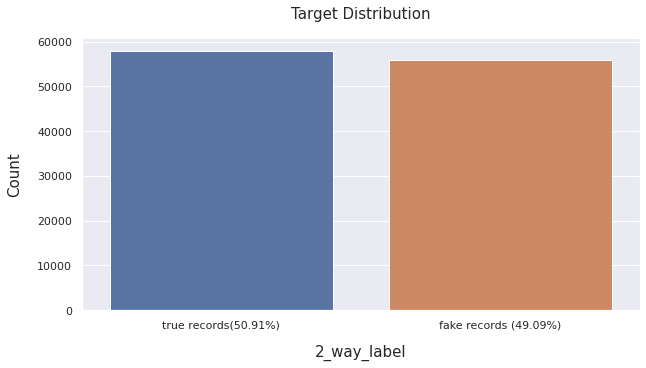


 Shape of train text data (113651,)

 Shape of train labels (113651,)


In [ ]:
X_train,y_train = xydata(df_train)

print("\n Shape of train text data", X_train.shape)
print("\n Shape of train labels", y_train.shape)


2132 of 4299 No of fake  news records and it is the 49.59% of the training set.
2167 of 4299  No of true news records and it is the 50.41% of the training set.


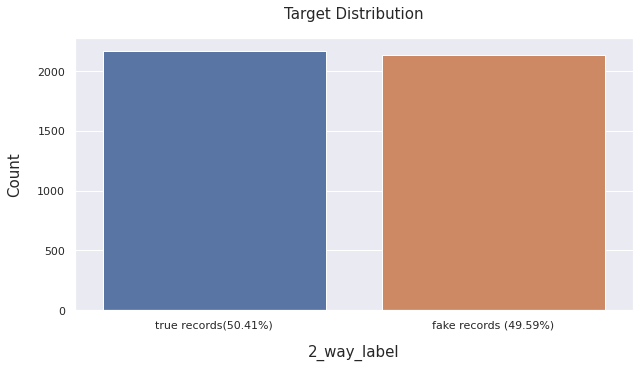


 Shape of validation text data (4299,)

 Shape of validation labels (4299,)


In [ ]:
X_validation,y_validation = xydata(df_validation)

print("\n Shape of validation text data", X_validation.shape)
print("\n Shape of validation labels", y_validation.shape)


2107 of 4296 No of fake  news records and it is the 49.05% of the training set.
2189 of 4296  No of true news records and it is the 50.95% of the training set.


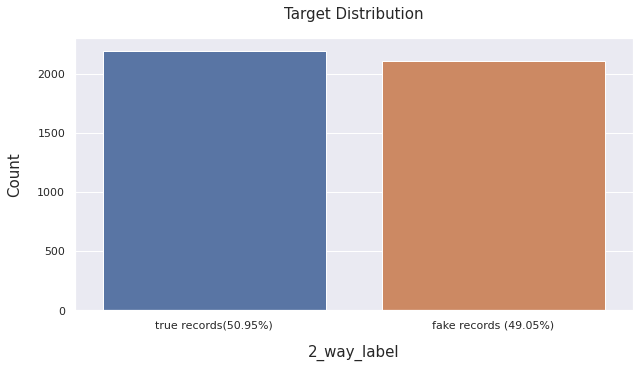


 Shape of test text data (4296,)

 Shape of test labels (4296,)


In [ ]:
X_test,y_test = xydata(df_test)

print("\n Shape of test text data", X_test.shape)
print("\n Shape of test labels", y_test.shape)

# Baseline models

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# This function evaluate the model on Accuracy, precision, F1-Score and Recall scores

def getResults(y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    print(f'Accuracy : {accuracy}\nPrecision : {precision}\nF1_score : {f1}\nRecall : {recall}\n')
    
    print("===== CONFUSION MATRIX =====")
    cf_matrix = confusion_matrix(y_test, prediction)
    print(cf_matrix)
    
    return accuracy, precision, f1, recall

In [ ]:
# function to train the model

def Model_training(model, x_train, y_train, x_test, y_test):
    print(f'\n==== Testing : {model.__class__}')
    # fit the data
    model.fit(x_train, y_train)
    
    # prediction
    prediction = model.predict(x_test)
    
    # getResults 
    results = getResults(y_test, prediction)
    return results

Models:

Multi-layer perceptron classifier (MLPClassifier)

solver = SGD - Stochastic Gradient Descent a linear classifier. popularly used for sparse data problems such as text classification and NLP.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
# Calling the Model_training to get the results
result_mlp = Model_training(nb, X_train, y_train, X_validation, y_validation)




==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.7657594789485926
Precision : 0.7404873877725524
F1_score : 0.7747707447998211
Recall : 0.8123827392120075

===== CONFUSION MATRIX =====
[[1560  607]
 [ 400 1732]]


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

# Calling the Model_training to get the results
result_sgd = Model_training(sgd, X_train, y_train, X_validation, y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.7036520120958363
Precision : 0.7803921568627451
F1_score : 0.6521026761332606
Recall : 0.5600375234521576

===== CONFUSION MATRIX =====
[[1831  336]
 [ 938 1194]]


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])

# Calling the Model_training to get the results
result_logreg = Model_training(logreg, X_train, y_train, X_validation, y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.7564549895324494
Precision : 0.7587029089175011
F1_score : 0.7524237408370773
Recall : 0.7462476547842402

===== CONFUSION MATRIX =====
[[1661  506]
 [ 541 1591]]


In [ ]:
#model
from sklearn.neural_network import MLPClassifier

mlp = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5,
                     solver='sgd', verbose=10,  random_state=21)),
               ])

# Calling the Model_training to get the results
result_mlp = Model_training(mlp, X_train, y_train, X_validation, y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Iteration 1, loss = 0.69305366
Iteration 2, loss = 0.69291086
Iteration 3, loss = 0.69273587
Iteration 4, loss = 0.69252244
Iteration 5, loss = 0.69224330
Accuracy : 0.5040707141195627
Precision : 0.0
F1_score : 0.0
Recall : 0.0

===== CONFUSION MATRIX =====
[[2167    0]
 [2132    0]]


In [ ]:
#necessary packages
from tensorflow.python.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Input
from tensorflow.keras.models import load_model
import nltk

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
def transformResults(predictions):
    
    predictions = predictions[:, 0]
    print(f'First 5 values before conversion : {predictions[:5]}')
    
    predictions = [1 if val>0.5 else 0 for val in predictions]
    print(f'First 5 values after the conversion : {predictions[:5]}')
    return predictions

# craeting lists to store results
models =[]
accuracy=[]
f1_scores=[]

def getResults(y_test, model_prediction,name):
    model_prediction = transformResults(model_prediction)

    print("\n========== RESULTS ===========\n")
    acc = accuracy_score(y_test, model_prediction)
    precision = precision_score(y_test, model_prediction)
    f1 = f1_score(y_test, model_prediction)
    recall = recall_score(y_test, model_prediction)
    
    accuracy.append(acc)
    models.append(name)
    f1_scores.append(f1)
    
    print(f'Accuracy : {acc}\nPrecision : {precision}\nF1_score : {f1}\nRecall : {recall}\n')
    
    print("===== CONFUSION MATRIX =====")
    cf_matrix = confusion_matrix(y_test, model_prediction)
    print(cf_matrix)
    
    return acc, precision, f1, recall

# Text vectorization

keras Text Vectorizer 
 
 Now that the vocab layer has been created, call `adapt` on the text-only dataset to create the vocabulary.

In [ ]:

max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)


In [ ]:
# each token has been replaced by an integer

vectorize_layer.adapt(X_train)

In [ ]:
#lookup the token (string) that each integer corresponds to by calling .get_vocabulary() on the layer.

print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  credit
 313 --->  hitler
Vocabulary size: 10000


In [ ]:
#function to see the result of using this layer to preprocess some data.
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text)

In [ ]:
#Apply the TextVectorization layer to the train, validation, and test dataset.

train_X = vectorize_text(X_train)
val_X = vectorize_text(X_validation)
test_X = vectorize_text(X_test)

# Basic neural network with keras

In [ ]:
input_dimention = train_X.shape[1]  # Number of features

Kerasmodel = Sequential()
Kerasmodel.add(layers.Dense(10, input_dim=input_dimention, activation='relu'))
Kerasmodel.add(layers.Dense(1, activation='sigmoid'))
Kerasmodel.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
input_shape = train_X.shape  
Kerasmodel.build(input_shape)

Kerasmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_2 (ModuleWra  (113651, 10)             2510      
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (113651, 1)              11        
 pper)                                                           
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model fit 
history = Kerasmodel.fit(train_X, y_train,
                    epochs=15,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=10)

Epoch 1/15
9092/9092 [==============================] - 135s 15ms/step - loss: 5.7086 - accuracy: 0.5909 - val_loss: 0.9730 - val_accuracy: 0.6259
Epoch 2/15
9092/9092 [==============================] - 128s 14ms/step - loss: 0.7191 - accuracy: 0.6202 - val_loss: 0.6490 - val_accuracy: 0.6315
Epoch 3/15
9092/9092 [==============================] - 127s 14ms/step - loss: 0.6514 - accuracy: 0.6272 - val_loss: 0.6448 - val_accuracy: 0.6438
Epoch 4/15
9092/9092 [==============================] - 133s 15ms/step - loss: 0.6403 - accuracy: 0.6335 - val_loss: 0.6526 - val_accuracy: 0.6366
Epoch 5/15
9092/9092 [==============================] - 127s 14ms/step - loss: 0.6396 - accuracy: 0.6319 - val_loss: 0.6344 - val_accuracy: 0.6405
Epoch 6/15
9092/9092 [==============================] - 127s 14ms/step - loss: 0.6363 - accuracy: 0.6298 - val_loss: 0.6702 - val_accuracy: 0.6254
Epoch 7/15
9092/9092 [==============================] - 134s 15ms/step - loss: 0.6364 - accuracy: 0.6303 - val_loss: 0

The classifier is constructed by gradually stacking the layers: 

An embedding layer makes up the top layer. This layer seeks for an embedding vector for each word-index using the integer-encoded reviews. As the model is trained, these vectors are learned. The output array gains a dimension thanks to the vectors. The dimensions that arise are: (batch, sequence, embedding). Visit the Word embeddings tutorial to learn more about embeddings. 
A GlobalAveragePooling1D layer then averages across the sequence dimension to produce a fixed-length output vector for each case. This makes it possible for the model to handle input of varying duration in the most straightforward manner. 
This fixed-length output vector is passed through a dense layer with 16 hidden units that is fully linked. 
The last layer has a single output node and is highly linked.

In [ ]:
embedding_dim = 16

#Create the model
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.build(input_shape)

model.summary()

#Loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

#Train the model
epochs = 10
history = model.fit(train_X, y_train,
                    epochs=epochs,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=10)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_29 (ModuleWr  (113651, 250, 16)        160016    
 apper)                                                          
                                                                 
 module_wrapper_30 (ModuleWr  (113651, 250, 16)        0         
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (113651, 16)             0         
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (113651, 16)             0         
 apper)                                                          
                                                                 
 module_wrapper_33 (ModuleWr  (113651, 1)             

# Word Embedding

Unlike one-hot encoding, which is hardcoded, this method represents words as dense word vectors (also known as word embeddings) that are trained. This means that word embeddings store more information in fewer dimensions.

In [ ]:
MAX_SEQUENCE_LENGTH=500
EMBEDDING_DIM=300 
dropout=0.5

def loadData_Tokenizer(Xtrain, Xvalidation):
    
    tokenizer = Tokenizer(num_words=5000, lower = False)

    tokenizer.fit_on_texts(Xtrain)

    train = tokenizer.texts_to_sequences(Xtrain)
    validation = tokenizer.texts_to_sequences(Xvalidation)
    
    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
    
    word_inndex =tokenizer.word_index

    
    return (train, validation,vocab_size,word_inndex )

X_train_t,X_validation_t, vocab_size,word_inndex= loadData_Tokenizer(X_train,X_validation)

In [ ]:
maxlen = 300


X_train_t = pad_sequences(X_train_t, padding='post', maxlen=maxlen)
X_validation_t = pad_sequences(X_validation_t, padding='post', maxlen=maxlen)

X_train_t.shape, X_validation_t.shape

((113651, 300), (4299, 300))

# Sequential model + Keras Embedding Layer Keras Embedding Layer bold text bold text

In [ ]:
embedding_dim = 50
input_shape = X_train_t.shape 


model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.build(input_shape)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (113651, 300, 50)        2665850   
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (113651, 15000)          0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (113651, 10)             150010    
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (113651, 1)              11        
 pper)                                                           
                                                                 
Total params: 2,815,871
Trainable params: 2,815,871
Non-

In [ ]:
#model fit
history = model.fit(X_train_t, y_train,
                    epochs=5,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=10)

score = model.evaluate(X_validation_t, y_validation, verbose=1)
print("Validation Score:", score[0])
print("Validation Accuracy:", score[1])

predictions = model.predict(X_validation_t)
print(predictions[:,0])

name="Sequentialmodel + KerasEmbeddingLayer"
results = getResults(y_validation, predictions,name)

Epoch 1/5
9092/9092 [==============================] - 572s 63ms/step - loss: 0.2370 - accuracy: 0.9035 - val_loss: 0.6101 - val_accuracy: 0.7726
Epoch 2/5
9092/9092 [==============================] - 581s 64ms/step - loss: 0.2116 - accuracy: 0.9135 - val_loss: 0.6631 - val_accuracy: 0.7648
Epoch 3/5
9092/9092 [==============================] - 605s 67ms/step - loss: 0.1913 - accuracy: 0.9212 - val_loss: 0.7642 - val_accuracy: 0.7604
Epoch 4/5
9092/9092 [==============================] - 613s 67ms/step - loss: 0.1741 - accuracy: 0.9292 - val_loss: 0.8113 - val_accuracy: 0.7619
Epoch 5/5
135/135 [==============================] - 1s 10ms/step - loss: 0.8804 - accuracy: 0.7579
Validation Score: 0.8803667426109314
Validation Accuracy: 0.7578506469726562
135/135 [==============================] - 1s 5ms/step
[0.00205774 0.1047484  0.00440221 ... 0.9998348  0.05832858 0.9986604 ]
First 5 values before conversion : [0.00205774 0.1047484  0.00440221 0.00682099 0.6924972 ]
First 5 values after

# Sequential model + Keras Embedding Layer + GlobalMaxPooling1D layer + CNN

In [ ]:
embedding_dim = 100

cnn_model = Sequential()
cnn_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
cnn_model.add(layers.Conv1D(128, 5, activation='relu'))
cnn_model.add(layers.GlobalMaxPooling1D())
cnn_model.add(layers.Dense(10, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn_model.build(input_shape)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_4 (ModuleWra  (113651, 300, 100)       5331700   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (113651, 296, 128)       64128     
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (113651, 128)            0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (113651, 10)             1290      
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (113651, 1)             

In [ ]:
history = cnn_model.fit(X_train_t, y_train,
                    epochs=5,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=10)

score = cnn_model.evaluate(X_validation_t, y_validation, verbose=1)
print("Validation Score:", score[0])
print("Validation Accuracy:", score[1])

predictions = cnn_model.predict(X_validation_t)
print(predictions[:,0])

name="Sequential model + Keras Embedding Layer + CNN"
results = getResults(y_validation, predictions,name)

Epoch 1/5
9092/9092 [==============================] - 905s 100ms/step - loss: 0.4656 - accuracy: 0.7821 - val_loss: 0.4438 - val_accuracy: 0.7955
Epoch 2/5
9092/9092 [==============================] - 913s 100ms/step - loss: 0.3802 - accuracy: 0.8315 - val_loss: 0.4394 - val_accuracy: 0.7996
Epoch 3/5
9092/9092 [==============================] - 913s 100ms/step - loss: 0.3044 - accuracy: 0.8717 - val_loss: 0.4754 - val_accuracy: 0.7890
Epoch 4/5
9092/9092 [==============================] - 895s 98ms/step - loss: 0.2267 - accuracy: 0.9088 - val_loss: 0.6138 - val_accuracy: 0.7856
Epoch 5/5
135/135 [==============================] - 4s 30ms/step - loss: 0.7427 - accuracy: 0.7739
Validation Score: 0.7427499294281006
Validation Accuracy: 0.7739009261131287
135/135 [==============================] - 4s 27ms/step
[0.2087211  0.0543826  0.01787718 ... 0.9960407  0.01639622 0.98408824]
First 5 values before conversion : [0.2087211  0.0543826  0.01787718 0.00612578 0.99919736]
First 5 values a

# Sequential model + Glove Embedding Layer + GlobalMaxPooling1D layer + CNN

In [ ]:
cd '/content/drive/MyDrive/project'

/content/drive/MyDrive/project


In [ ]:
embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in word_inndex.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_dim = 100
input_shape = X_train_t.shape

cnn_g_model = Sequential()
cnn_g_model.add(layers.Embedding(vocab_size,
                            100,
                            weights=[embedding_matrix],
                            trainable=False))
cnn_g_model.add(layers.Conv1D(128, 5, activation='relu'))
cnn_g_model.add(layers.GlobalMaxPooling1D())
cnn_g_model.add(layers.Dense(10, activation='relu'))
cnn_g_model.add(layers.Dense(1, activation='sigmoid'))
cnn_g_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn_g_model.build(input_shape)
cnn_g_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_9 (ModuleWra  (113651, 300, 100)       5331700   
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (113651, 296, 128)       64128     
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (113651, 128)            0         
 apper)                                                          
                                                                 
 module_wrapper_12 (ModuleWr  (113651, 10)             1290      
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (113651, 1)             

In [ ]:
history = cnn_g_model.fit(X_train_t, y_train,
                    epochs=5,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=10)

score = cnn_g_model.evaluate(X_validation_t, y_validation, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

predictions = cnn_g_model.predict(X_validation_t)
print(predictions[:,0])
name = 'Sequential model + Glove Embedding Layer + CNN'
social_results = getResults(y_validation, predictions,name)


Epoch 1/5
9092/9092 [==============================] - 523s 58ms/step - loss: 0.4913 - accuracy: 0.7642 - val_loss: 0.4642 - val_accuracy: 0.7795
Epoch 2/5
9092/9092 [==============================] - 500s 55ms/step - loss: 0.4393 - accuracy: 0.7968 - val_loss: 0.4568 - val_accuracy: 0.7875
Epoch 3/5
9092/9092 [==============================] - 461s 51ms/step - loss: 0.4082 - accuracy: 0.8150 - val_loss: 0.4610 - val_accuracy: 0.7833
Epoch 4/5
9092/9092 [==============================] - 452s 50ms/step - loss: 0.3791 - accuracy: 0.8310 - val_loss: 0.4621 - val_accuracy: 0.7880
Epoch 5/5
135/135 [==============================] - 4s 31ms/step - loss: 0.4869 - accuracy: 0.7720
Test Score: 0.48689398169517517
Test Accuracy: 0.7720400094985962
135/135 [==============================] - 5s 34ms/step
[0.7517869  0.26260784 0.02154005 ... 0.7874384  0.6192333  0.9559944 ]
First 5 values before conversion : [0.7517869  0.26260784 0.02154005 0.06332425 0.97592586]
First 5 values after the conve

# Recursive Neural Networks(RNN)


In [ ]:
from numpy import array
from keras_preprocessing.sequence import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import Input
from keras.models import Model
from keras.layers import Embedding
from keras.models import load_model
from keras.layers import Bidirectional

from nltk.tokenize import word_tokenize
import re


from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
# To get some statistical insights about the data
import nltk
nltk.download('punkt')

import statistics


def insights(data):
  length = 0
  val = ""
  data_avg = []

  for sentence in data:
    sen_len = len(word_tokenize(sentence))
    data_avg.append(sen_len)
    if sen_len > length:
       length = sen_len
       val = sentence

  print(f'Sentence : {val}\nLength :{length}')
  print(f'Average Sentence Length : {sum(data_avg) / len(data_avg)}')
  print(f'Standard Dev : {statistics.pstdev(data_avg)}') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#statistical insights about the training data
insights(X_train)

Sentence : i know who you are i know what you want you are looking at keith i can tell you you cant have him but what i have are a very particular set of skills gossiping skills i have acquired over a very long time skills that make me a nightmare for losers like you if you stop going near my boyfriend thatll be the end of it i will not talk about you i will not even think of you but if you dont i will talk about you i will spread lies about you and i will kill your reputation
Length :101
Average Sentence Length : 8.018292843881708
Standard Dev : 5.699013499294065


In [ ]:
#statistical insights about the Validation data
insights(X_validation)

Sentence : alright mr president heres the situation we have several navy relief ships stationed in the gulf of mexico with reinforcements coming in from honduras and texas everyone to the south of this region can take a risk and rendezvous in colombia everybody north of this region is already dead those trapped in between will merge on this path and cross this line into the yellow area escape boats will be stationed in this region where victims will exit through the southeastern point they will then disperse into the atlantic ocean
Length :90
Average Sentence Length : 8.211444521981857
Standard Dev : 6.214600553863805


In [ ]:
#Convert texts to sequence Then pad these sequences based on the max_len variable which is 100 in our case The max_len = 100 variable was choosen based on the criteria that majority of the sentences did fit under this value, which eventually enables us to have a dense matrix.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_validation = tokenizer.texts_to_sequences(X_validation)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_validation = pad_sequences(X_validation, padding='post', maxlen=maxlen)

In [ ]:
#chech the shape of tokenized data
X_train.shape, X_validation.shape

((113651, 100), (4299, 100))

In [ ]:
embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# LSTM model

In [ ]:
def getLSTMModel():
    deep_inputs = Input(shape=(maxlen,))
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
    LSTM_Layer_1 = LSTM(128)(embedding_layer)
    dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
    model = Model(inputs=deep_inputs, outputs=dense_layer_1)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

model = getLSTMModel()

history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

predictions = model.predict(X_validation)
print(predictions[:,0])

name = "LSTM"

LSTM_results = getResults(y_validation, predictions,name)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 100, 100)          5323300   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,440,677
Trainable params: 117,377
Non-trainable params: 5,323,300
_________________________________________________________________
None
Epoch 1/5
622/622 [==============================] - 449s 721ms/step - loss: 0.6931 - acc: 0.5066 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 2/5
622/622 [================

# Bi-directional LSTM

In [ ]:
def getBidirectionalModel():
    # Input for variable-length sequences of integers
    inputs = Input(shape=(maxlen,))
    # Embedding layer
    x = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(inputs)
    # Add bidirectional LSTMs
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(128))(x)
    # Dense layer
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs, outputs)
    print(model.summary())
    model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
    return model

model_LSTM_bi_di = getBidirectionalModel()

history = model_LSTM_bi_di.fit(X_train, y_train, batch_size=128, epochs=3, verbose=1, validation_split=0.2)

predictions_bi_LSTM = model_LSTM_bi_di.predict(X_validation)
print(predictions_bi_LSTM[:,0])

name = "Bi-direction LSTM"

results_bi_LSTM = getResults(y_validation, predictions_bi_LSTM, name)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 100)          5323300   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,952,293
Trainable params: 628,993
Non-train

In [ ]:
df_results = pd.DataFrame(list(zip(models, accuracy, f1_scores)), 
               columns =['model', 'accuracy','f1_score']) 
df_results

,model,accuracy,f1_score
0,Sequential model + Keras Embedding Layer + CNN,0.773901,0.763619
1,Sequential model + Glove Embedding Layer + CNN,0.772040,0.771668
2,LSTM,0.504071,0.000000
3,Bi-direction LSTM,0.814841,0.822559
